In [134]:
import pandas as pd
import matplotlib.pyplot as plt

Company Shares by retail sales

In [135]:
df = pd.read_csv("Euromonitor Soup Companies.csv")
df_chilled = df[df['Category'] == 'Chilled Soup']
df_chilled

,Geography,Category,Company Name,Data Type,2017,2018,2019,2020,2021,2022
40,Ireland,Chilled Soup,"Hain Celestial Group Inc, The",Retail Value RSP,41.4,41.8,42.1,42.5,42.1,41.7
41,Ireland,Chilled Soup,Glanbia Plc,Retail Value RSP,37.6,36.1,34.5,32.9,32.6,32.3
42,Ireland,Chilled Soup,"Kilkenny Food Co, The",Retail Value RSP,6.3,5.9,5.4,5.0,5.0,4.9
43,Ireland,Chilled Soup,Just Food Co,Retail Value RSP,0.7,0.8,0.8,0.9,0.9,0.9
44,Ireland,Chilled Soup,Simply Organic Ltd,Retail Value RSP,0.3,0.2,0.2,0.2,0.2,0.2
45,Ireland,Chilled Soup,Country Kitchen Cuisine Ltd,Retail Value RSP,0.1,0.1,0.1,0.1,0.1,0.0
46,Ireland,Chilled Soup,Private Label,Retail Value RSP,7.7,8.8,10.3,11.7,11.6,11.5
47,Ireland,Chilled Soup,Others,Retail Value RSP,6.0,6.3,6.5,6.8,7.6,8.4
48,Ireland,Chilled Soup,Total,Retail Value RSP,100.0,100.0,100.0,100.0,100.0,100.0


In [136]:
df_chilled = df_chilled.iloc[:-1]


In [137]:
df_chilled['2022'] = df_chilled['2022'].astype(float)

C:\Users\buckl\AppData\Local\Temp/ipykernel_20872/884726847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chilled['2022'] = df_chilled['2022'].astype(float)


In [138]:
df_chilled = df_chilled.sort_values(by='2022', ascending = False)
df_chilled

,Geography,Category,Company Name,Data Type,2017,2018,2019,2020,2021,2022
40,Ireland,Chilled Soup,"Hain Celestial Group Inc, The",Retail Value RSP,41.4,41.8,42.1,42.5,42.1,41.7
41,Ireland,Chilled Soup,Glanbia Plc,Retail Value RSP,37.6,36.1,34.5,32.9,32.6,32.3
46,Ireland,Chilled Soup,Private Label,Retail Value RSP,7.7,8.8,10.3,11.7,11.6,11.5
47,Ireland,Chilled Soup,Others,Retail Value RSP,6.0,6.3,6.5,6.8,7.6,8.4
42,Ireland,Chilled Soup,"Kilkenny Food Co, The",Retail Value RSP,6.3,5.9,5.4,5.0,5.0,4.9
43,Ireland,Chilled Soup,Just Food Co,Retail Value RSP,0.7,0.8,0.8,0.9,0.9,0.9
44,Ireland,Chilled Soup,Simply Organic Ltd,Retail Value RSP,0.3,0.2,0.2,0.2,0.2,0.2
45,Ireland,Chilled Soup,Country Kitchen Cuisine Ltd,Retail Value RSP,0.1,0.1,0.1,0.1,0.1,0.0


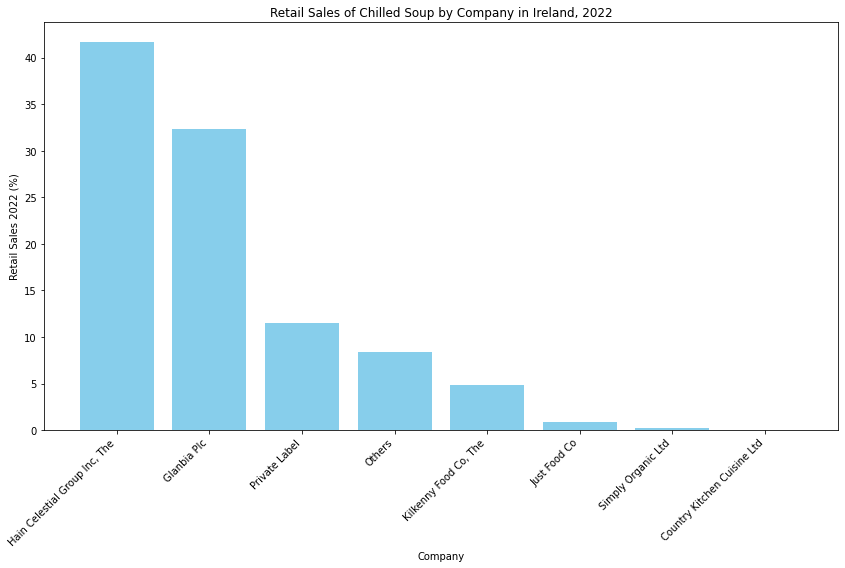

In [139]:

plt.figure(figsize=(12, 8))
plt.bar(df_chilled['Company Name'], df_chilled['2022'], color='skyblue')
plt.xlabel('Company')
plt.ylabel('Retail Sales 2022 (%)')
plt.title('Retail Sales of Chilled Soup by Company in Ireland, 2022')
plt.xticks(rotation=45, ha="right")  # Rotate labels to avoid overlap
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()


Market Size (millions of euro)

In [140]:
df = pd.read_csv("Euromonitor Soup Market Size.csv")
df = df[(df['Category'] == 'Chilled Soup') & (df['Data Type'] == 'Retail Value RSP')]
df

,Geography,Category,Data Type,Unit,Current Constant,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
7,Ireland,Chilled Soup,Retail Value RSP,EUR million,Current Prices,38.5,40.1,42.5,45.1,45.1,48.3,50.5,52.3,54.0,55.8,57.6


In [141]:
actual_years = ['2017','2018','2019','2020','2021','2022','2023']
forecast_years = ['2023','2024','2025','2026','2027']

In [142]:
actual_sales = df[actual_years].values[0]
forecast_sales = df[forecast_years].values[0]
actual_sales

array(['38.5', '40.1', '42.5', '45.1', '45.1', '48.3', '50.5'],
      dtype=object)

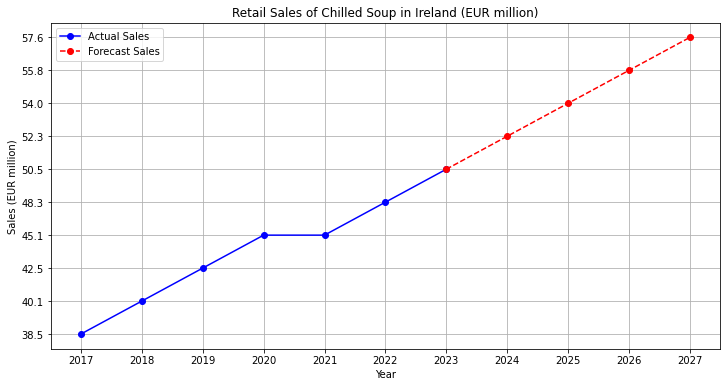

In [143]:
# Correcting the concatenation error for forecast sales to ensure dimensions match for plotting
plt.figure(figsize=(12, 6))
plt.plot(actual_years, actual_sales, label='Actual Sales', marker='o', linestyle='-', color='blue')
# Correctly extending the actual sales with forecast sales without causing dimension mismatch
plt.plot(forecast_years, forecast_sales, label='Forecast Sales', marker='o', linestyle='--', color='red', 
         # This line ensures continuity from the last actual point to the first forecast point
         drawstyle="default")  
plt.title('Retail Sales of Chilled Soup in Ireland (EUR million)')
plt.xlabel('Year')
plt.ylabel('Sales (EUR million)')
plt.legend()
plt.grid(True)
plt.show()
